In [1]:
import numpy as np
import pandas as pd
import random
import os
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score, precision_recall_curve, precision_score, recall_score, average_precision_score,cohen_kappa_score,matthews_corrcoef

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [5]:
# import 1416 training dataset
df_train = pd.read_csv(r"D:\Data Analytics for Business\SEM 4\DAB402 Capstone Project\final_trainingset.csv")
df_train.head()

,Unnamed: 0,rcvTime,sendTime,senderPseudo,messageID,pos_x,pos_y,spd_x,spd_y,acl_x,acl_y,hed_x,hed_y,nttack
0,0,25208.058553,25208.058553,10152.0,16924.0,136.194253,1117.140023,0.216103,-2.305897,0.138614,-1.479031,0.092531,-0.99571,1.0
1,1,25208.225220,25208.225220,10152.0,16982.0,136.194253,1117.140023,0.216103,-2.305897,0.138614,-1.479031,0.092531,-0.99571,1.0
2,2,25208.391887,25208.391887,10152.0,17000.0,136.194253,1117.140023,0.216103,-2.305897,0.138614,-1.479031,0.092531,-0.99571,1.0
3,3,25208.558554,25208.558554,10152.0,17018.0,136.194253,1117.140023,0.216103,-2.305897,0.138614,-1.479031,0.092531,-0.99571,1.0
4,4,25208.725221,25208.725221,10152.0,17048.0,136.194253,1117.140023,0.216103,-2.305897,0.138614,-1.479031,0.092531,-0.99571,1.0


In [6]:
# import 1416 test dataset
df_test =pd.read_csv(r"D:\Data Analytics for Business\SEM 4\DAB402 Capstone Project\final_testset.csv")
df_test.head()

,Unnamed: 0,rcvTime,sendTime,senderPseudo,messageID,pos_x,pos_y,spd_x,spd_y,acl_x,acl_y,hed_x,hed_y,nttack
0,5580128,50518.792049,50518.792049,202915.0,532175.0,144.464465,930.876860,0.156174,-2.183978,0.162077,-2.186094,0.070178,-0.997535,1.0
1,5580129,50518.801205,50518.801205,401715.0,532225.0,854.081340,432.132793,0.164967,0.041049,0.159764,0.045936,0.966307,0.257393,1.0
2,5580130,50518.801205,50518.801205,401715.0,532225.0,854.081340,432.132793,0.164967,0.041049,0.159764,0.045936,0.966307,0.257393,1.0
3,5580131,50518.801205,50518.801205,401715.0,532225.0,854.081340,432.132793,0.164967,0.041049,0.159764,0.045936,0.966307,0.257393,1.0
4,5580132,50518.805879,50518.805879,301535.0,532365.0,719.507467,825.450082,-0.329691,0.265323,-0.340650,0.252613,-0.543654,0.839309,1.0


In [7]:
# Converting attacker columns from float to integer
df_train['nttack'] = df_train['nttack'].astype(np.int64)
df_test['nttack'] = df_test['nttack'].astype(np.int64)

In [8]:
# getting information about the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5580128 entries, 0 to 5580127
Data columns (total 14 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Unnamed: 0    int64  
 1   rcvTime       float64
 2   sendTime      float64
 3   senderPseudo  float64
 4   messageID     float64
 5   pos_x         float64
 6   pos_y         float64
 7   spd_x         float64
 8   spd_y         float64
 9   acl_x         float64
 10  acl_y         float64
 11  hed_x         float64
 12  hed_y         float64
 13  nttack        int64  
dtypes: float64(12), int64(2)
memory usage: 596.0 MB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1395032 entries, 0 to 1395031
Data columns (total 14 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Unnamed: 0    1395032 non-null  int64  
 1   rcvTime       1395032 non-null  float64
 2   sendTime      1395032 non-null  float64
 3   senderPseudo  1395032 non-null  float64
 4   messageID     1395032 non-null  float64
 5   pos_x         1395032 non-null  float64
 6   pos_y         1395032 non-null  float64
 7   spd_x         1395032 non-null  float64
 8   spd_y         1395032 non-null  float64
 9   acl_x         1395032 non-null  float64
 10  acl_y         1395032 non-null  float64
 11  hed_x         1395032 non-null  float64
 12  hed_y         1395032 non-null  float64
 13  nttack        1395032 non-null  int64  
dtypes: float64(12), int64(2)
memory usage: 149.0 MB


In [11]:
# Creating training and test sets
x_train = df_train.drop(['nttack'],axis=1).values
y_train = df_train['nttack'].values

x_test = df_test.drop(['nttack'],axis=1).values
y_test = df_test['nttack'].values

In [12]:
# creating dataframe of x_train to get index of values
dum_x_train = df_train.drop(['nttack'],axis=1)

In [13]:
x_train.shape

(5580128, 13)

In [16]:
#Normalizing the data
sc = StandardScaler()
x_train  = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [17]:
# reshaping the target variable
y_test = y_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [20]:
def create_clients(X, y, initial='client'):

    # creating a client name dict with keys as receiver id and value as data of those receiver id
    client_names = {}
    for clients in dum_x_train['receiver_id'].unique(): 
        ind = dum_x_train[dum_x_train['receiver_id'] == clients].index.to_list()
        data = list(zip(X, y))
        client_names[f'{initial}_{clients}'] = [data[i] for i in ind]
        
    return client_names

In [ ]:
#create clients
clients = create_clients(x_train, y_train, initial='client')

In [31]:
len(clients)

1290

In [ ]:
def batch_data(data_shard, bs=8):
    '''Takes in a clients data shard and create a tfds object of it
    args:
        shard: a data, label constituting a client's data shard
        bs:batch size
    return:
        tfds object'''
    #seperate shard into data and labels lists
    data, label = zip(*data_shard)
    dataset = tf.data.Dataset.from_tensor_slices((list(data), list(label)))
    return dataset.batch(bs)

In [ ]:
#process and batch the training data for each client
clients_batched = dict()
for (client_name, data) in clients.items():
    clients_batched[client_name] = batch_data(data)
#process and batch the test set  
test_batched = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(len(y_test))

In [36]:
print(clients_batched['client_21'])

<BatchDataset shapes: ((None, 14), (None,)), types: (tf.float64, tf.int32)>


In [ ]:
class SimpleMLP:
    @staticmethod
    def build(shape, classes=2):
        model = Sequential()
        model.add(Dense(64, input_shape=(shape,) , activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(128, activation = 'relu'))
        model.add(Dropout(0.2))
        model.add(Dense(256, activation = 'relu'))
        model.add(Dense(classes, activation='softmax'))
        return model

In [58]:
x_train.shape

(1130329, 14)

In [60]:
y_train[0]

array([1., 0.], dtype=float32)

In [ ]:
lr = 0.01 
loss='binary_crossentropy'
metrics = ['accuracy']
optimizer = Adam(learning_rate=lr, 
                decay=lr / 10)    

In [ ]:
def weight_scalling_factor(clients_trn_data, client_name):
    client_names = list(clients_trn_data.keys())
    #get the bs
    bs = list(clients_trn_data[client_name])[0][0].shape[0]
    #first calculate the total training data points across clinets
    global_count = sum([tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy() for client_name in client_names])*bs
    # get the total number of data points held by a client
    local_count = tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy()*bs
    return local_count/global_count

In [ ]:
def scale_model_weights(weight, scalar):
    '''function for scaling a models weights'''
    weight_final = []
    steps = len(weight)
    for i in range(steps):
        weight_final.append(scalar * weight[i])
    return weight_final

In [ ]:
def sum_scaled_weights(scaled_weight_list):
    '''Return the sum of the listed scaled weights. The is equivalent to scaled avg of the weights'''
    avg_grad = list()
    #get the average grad accross all client gradients
    for grad_list_tuple in zip(*scaled_weight_list):
        layer_mean = tf.math.reduce_sum(grad_list_tuple, axis=0)
        avg_grad.append(layer_mean)

    return avg_grad

In [ ]:
def test_model(X_test, Y_test,  model, comm_round):
    bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    #logits = model.predict(X_test, batch_size=100)
    logits = model.predict(X_test)
    loss = bce(Y_test, logits)
    acc = accuracy_score(tf.argmax(logits, axis=1), tf.argmax(Y_test, axis=1))
    print('Communication Round: {} | acc: {:.3%} | loss: {}'.format(comm_round, acc, loss))
    return acc, loss

In [30]:
#initialize global model
smlp_global = SimpleMLP()
global_model = smlp_global.build(12, 1)

global_acc_list = []
global_precision_list = []
global_recall_list = []

comms_round = 3

#commence global training loop
for comm_round in range(comms_round):
    
    # get the global model's weights - will serve as the initial weights for all local models
    global_weights = global_model.get_weights()
    
    #initial list to collect local model weights after scalling
    scaled_local_weight_list = list()

    #randomize client data - using keys
    client_names= list(clients_batched.keys())
    random.shuffle(client_names)
    
    #loop through each client and create new local model
    for client in client_names:
        
        smlp_local = SimpleMLP()
        local_model = smlp_local.build(12,1)
        local_model.compile(loss=loss, 
                      optimizer=optimizer, 
                      metrics=metrics)
        
        #set local model weight to the weight of the global model
        local_model.set_weights(global_weights)

        local_model.fit(clients_batched[client], epochs=1, verbose=0)
        
        #scale the model weights and add to list
        scaling_factor = weight_scalling_factor(clients_batched, client)
        scaled_weights = scale_model_weights(local_model.get_weights(), scaling_factor)
        scaled_local_weight_list.append(scaled_weights)
        
        #clear session to free memory after each communication round
        K.clear_session()
        
    #to get the average over all the local model, we simply take the sum of the scaled weights
    average_weights = sum_scaled_weights(scaled_local_weight_list)
    
    #update global model 
    global_model.set_weights(average_weights)
    
    model_json = global_model.to_json()
    with open("global_model_edit.json", "w") as json_file:
        json_file.write(model_json)
    
    # serialize weights to HDF5
    global_model.save_weights("model_edit.h5")
    
    #test global model and print out metrics after each communications round
    for(X_test, Y_test) in test_batched:
        global_acc, global_loss = test_model(X_test, Y_test, global_model, comm_round)
        global_acc_list.append(global_acc)  
        y_pred = global_model.predict(X_test)
        global_precision = precision_score(tf.argmax(Y_test, axis=1), tf.argmax(y_pred, axis=1), average='weighted', labels = [0,1])
        global_precision_list.append(global_precision)
        
        global_recall = recall_score(tf.argmax(Y_test, axis=1), tf.argmax(y_pred, axis=1), average='weighted', labels = [0,1])
        global_recall_list.append(global_recall)

Communication Round: 0 | acc: 68.701% | loss: 0.6540147066116333
Communication Round: 1 | acc: 70.803% | loss: 0.6393766403198242
Communication Round: 2 | acc: 72.486% | loss: 0.6337358355522156


In [31]:
sgd_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(8)
print("Creating Model")
smlp_sgd = SimpleMLP()
sgd_model = smlp_sgd.build(12, 1) 

sgd_acc_list = []
sgd_precision_list = []
sgd_recall_list = []
print("Compiling Model")
sgd_model.compile(loss=loss, 
              optimizer=optimizer, 
              metrics=metrics)

print("Model Compiled.\nEntering Communication Rounds")
# fit the SGD training data to model
for i in range(3):

    sgd_model.fit(x_train, y_train, epochs=1, verbose=0)
    for(X_test, Y_test) in test_batched:
        sgd_acc, sgd_loss = test_model(X_test, Y_test, sgd_model, i)
        sgd_acc_list.append(sgd_acc)
        
        y_pred = sgd_model.predict(X_test)
        
        sgd_precision = precision_score(tf.argmax(Y_test, axis=1), tf.argmax(y_pred, axis=1), average='weighted', labels = [0,1])
        sgd_precision_list.append(sgd_precision)
        
        sgd_recall = recall_score(tf.argmax(Y_test, axis=1), tf.argmax(y_pred, axis=1), average='weighted', labels = [0,1])
        sgd_recall_list.append(sgd_recall)

Creating Model
Compiling Model
Model Compiled.
Entering Communication Rounds
Communication Round: 0 | acc: 83.937% | loss: 0.5912440419197083
Communication Round: 1 | acc: 83.937% | loss: 0.5923143625259399
Communication Round: 2 | acc: 83.937% | loss: 0.5938546061515808


In [ ]:
model_json = sgd_model.to_json()
with open("sgd_model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
sgd_model.save_weights("sgd_model.h5")

In [32]:
df = pd.DataFrame()
df['FL_accuracy'] = global_acc_list
df['SGD_accuracy'] = sgd_acc_list
df['FL_precision'] = global_precision_list
df['SGD_precision'] = sgd_precision_list
df['FL_recall'] = global_recall_list
df['SGD_recall'] = sgd_recall_list

In [33]:
df.head(10)

,FL_accuracy,SGD_accuracy,FL_precision,SGD_precision,FL_recall,SGD_recall
0,0.687005,0.839368,0.695345,0.877927,0.687005,0.839368
1,0.708029,0.839368,0.714326,0.877927,0.708029,0.839368
2,0.724860,0.839368,0.725434,0.877927,0.724860,0.839368


In [ ]:
df.to_csv("FL_SGD_metrics_values.csv", index = False)

In [ ]:
if not os.path.exists('Plots'):
    os.mkdir('Plots')

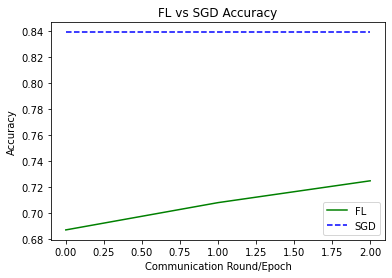

In [34]:
cr = np.arange(comms_round)
plt.plot(cr, global_acc_list, 'g', label = 'FL')
plt.plot(cr, sgd_acc_list, '--b', label = 'SGD')
plt.title('FL vs SGD Accuracy')
plt.xlabel('Communication Round/Epoch')
plt.ylabel('Accuracy')
plt.legend()
# plt.savefig(f'Plots/FL vs SGD Accuracy.png', dpi=150)
plt.show()

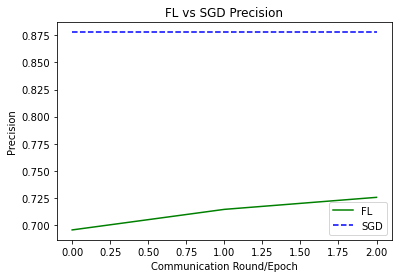

In [35]:
cr = np.arange(comms_round)
plt.plot(cr, global_precision_list, 'g', label = 'FL')
plt.plot(cr, sgd_precision_list, '--b', label = 'SGD')
plt.title('FL vs SGD Precision')
plt.xlabel('Communication Round/Epoch')
plt.ylabel('Precision')
plt.legend()
# plt.savefig(f'Plots/FL vs SGD Precision.png', dpi=150)
plt.show()

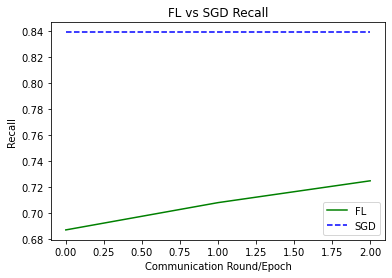

In [36]:
cr = np.arange(comms_round)
plt.plot(cr, global_recall_list, 'g', label = 'FL')
plt.plot(cr, sgd_recall_list, '--b', label = 'SGD')
plt.title('FL vs SGD Recall')
plt.xlabel('Communication Round/Epoch')
plt.ylabel('Recall')
plt.legend()
# plt.savefig(f'Plots/FL vs SGD Recall.png', dpi=150)
plt.show()